In [2]:
import pandas as pd
import numpy as np
from datetime import datetime, date
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

import matplotlib.pyplot as plt
import seaborn as sns

import scipy

In [72]:
import pandas as pd
import numpy as np
from datetime import datetime, date

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder 
from sklearn.pipeline import FeatureUnion
from sklearn.ensemble import RandomForestClassifier
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.model_selection import StratifiedKFold
from catboost import CatBoostClassifier
#from lightgbm import LGBMClassifier

## Model building

In [73]:
df = pd.read_csv('train_data_nolog_pc.csv')
df.head()

,acct_type_desc,event_name,plan_event_name,comp_name,row_name,SeatNum,PC1,Price,paid,class_name,...,event_date_weekday,event_holiday_or_not,Section_Name_based_on_price,comp_name_group,event_date_day,isEndMonth,sales_crc_encode,Difference_resale,Difference,event_date_weeknum
0,Season,CLT21HOU,FS,Not Comp,10,1,F,111.0,Y,OPEN,...,6,False,Yellow,0,17,1,0,-1.0,199,41
1,Season,CLT21HOU,FS,Not Comp,10,10,F,111.0,Y,OPEN,...,6,False,Yellow,0,17,1,0,-1.0,199,41
2,Season,CLT21HOU,FS,Not Comp,10,11,F,111.0,Y,OPEN,...,6,False,Yellow,0,17,1,0,-1.0,199,41
3,Season,CLT21HOU,FS,Not Comp,10,12,F,111.0,Y,OPEN,...,6,False,Yellow,0,17,1,0,-1.0,199,41
4,Season,CLT21HOU,FS,Not Comp,10,13,F,111.0,Y,OPEN,...,6,False,Yellow,0,17,1,0,-1.0,199,41


In [125]:
df.columns

Index(['acct_type_desc', 'event_name', 'plan_event_name', 'comp_name',
       'row_name', 'SeatNum', 'PC1', 'Price', 'paid', 'class_name', 'status',
       'isHost', 'SeatType', 'TicketClass', 'Term', 'TicketType',
       'SeatUniqueID', 'Season', 'Tenure', 'UniqueID', 'isAttended', 'Resold',
       'ResalePrice', 'isSTM', 'row_name_new', 'price_code_mod',
       'event_date_weekday', 'event_holiday_or_not',
       'Section_Name_based_on_price', 'comp_name_group', 'event_date_day',
       'isEndMonth', 'sales_crc_encode', 'Difference_resale', 'Difference',
       'event_date_weeknum', 'acct_type_desc_mod', 'TicketClass_mode'],
      dtype='object')

In [103]:
df['acct_type_desc_mod'] = df['acct_type_desc'].apply(lambda x: 'Huntington' 
                                                      if 'Huntington' in str(x) else x)
df['acct_type_desc_mod'] = df['acct_type_desc_mod'].apply(lambda x: 'Group'
                                                          if 'Group' in str(x) else x)
df['acct_type_desc_mod'] = df['acct_type_desc_mod'].apply(lambda x: 'Hold'
                                                          if 'Hold' in str(x) else x)

In [104]:
df['acct_type_desc_mod'].value_counts()

Season            628879
Club              134181
House             112408
Unknown            83485
Personal           71958
Sponsor            45106
Group              28389
Employee           26865
Comp                9310
Suite               6076
Player              4401
Opponents           3063
Single Game         2346
Huntington          1545
SG Suite             135
IU 2022               31
Kids Club             15
NONRENEWAL            15
Hold                  10
Window Account         8
Premium                2
Name: acct_type_desc_mod, dtype: int64

#### Removing outliers

In [8]:
df=df[df['Price']<600]

In [120]:
df['TicketClass_mode'] = df['TicketClass'].apply(lambda x: 'Obstruct' 
                                                      if 'Obstruct' in str(x) else x)

In [11]:
df['isAttended'].value_counts()

1    900872
0    257281
Name: isAttended, dtype: int64

In [12]:
df = df.drop(['SeatUniqueID', 'UniqueID'],axis =1) 

In [15]:
num_attribs = ['ResalePrice','Price',
       'Tenure','Difference','Difference_resale']
cat_attribs = ['Section_Name_based_on_price','SeatNum','isHost','PC1',
               'Resold','isSTM','event_date_weeknum','event_date_weekday',
               'Season','acct_type_desc_mod','event_name','plan_event_name','row_name',
               'paid','class_name','status','TicketClass_mode',
               'TicketType','Term','price_code_mod','comp_name', 'SeatType','TicketType','isEndMonth']

In [16]:
X = df.drop(['isAttended'],axis =1)
y = df['isAttended']

### Dython Analysis to check for Multi collinearity

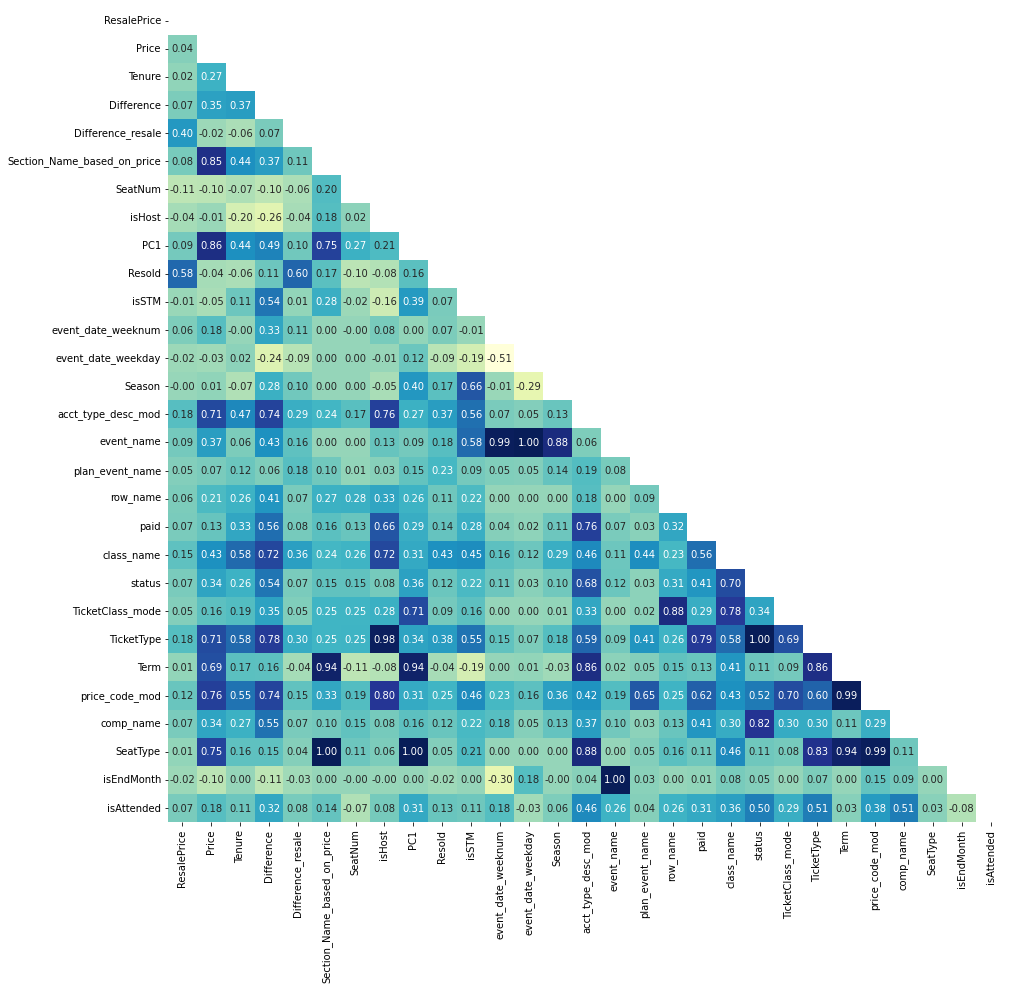

In [179]:
df_complete_corr=categorical_correlation['corr']
data = df[num_attribs + cat_attribs + ['isAttended']]
mask = np.triu(np.ones_like(df_complete_corr))
plt.figure(figsize = (15,15))
dataplot = sns.heatmap(df_complete_corr, cmap="YlGnBu", annot=True, mask=mask, cbar = False, fmt='.2f')
# displaying heatmap
plt.show()

In [180]:
categorical_correlation['corr'].isAttended.sort_values(ascending = False)

isAttended                     1.000000
comp_name                      0.508299
TicketType                     0.507527
status                         0.500601
acct_type_desc_mod             0.463261
price_code_mod                 0.382268
class_name                     0.360996
Difference                     0.321824
paid                           0.313513
PC1                            0.312306
TicketClass_mode               0.286854
row_name                       0.262553
event_name                     0.262117
event_date_weeknum             0.181196
Price                          0.175968
Section_Name_based_on_price    0.135796
Resold                         0.127049
Tenure                         0.112631
isSTM                          0.107195
isHost                         0.082905
Difference_resale              0.077933
ResalePrice                    0.074875
Season                         0.060443
plan_event_name                0.043907
Term                           0.034785


### Checking if the categorical columns have limited number of categories

In [17]:
for i in cat_attribs:
    print(i, df[i].nunique())

Section_Name_based_on_price 23
SeatNum 50
isHost 2
PC1 31
Resold 2
isSTM 2
event_date_weeknum 16
event_date_weekday 4
Season 2
acct_type_desc_mod 21
event_name 16
plan_event_name 5
row_name 67
paid 4
class_name 46
status 4
TicketClass_mode 5
TicketType 26
Term 6
price_code_mod 204
comp_name 23
SeatType 2
TicketType 26
isEndMonth 2


## Splitting the data into train and test

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Pipeline Creation
- Numerical piepline
- Categorical pipeline

In [19]:
num_pipeline = Pipeline([
        ('std_scaler', StandardScaler())
    ])

cat_pipeline = Pipeline([
        #('imputer',SimpleImputer(strategy = "most_frequent")),
        ('cat_encoder', OneHotEncoder(handle_unknown='ignore'))
    ])

In [20]:
full_pipeline = ColumnTransformer(transformers=[
        ("num_pipeline", num_pipeline, num_attribs),
        ("cat_pipeline", cat_pipeline, cat_attribs),
    ])

In [21]:
X_train_prepared = full_pipeline.fit_transform(X_train)
X_test_prepared = full_pipeline.transform(X_test)

In [22]:
X_train_prepared

<810707x595 sparse matrix of type '<class 'numpy.float64'>'
	with 23510503 stored elements in Compressed Sparse Row format>

In [23]:
cat_features = full_pipeline.transformers_[1][1]\
    ['cat_encoder'].get_feature_names_out(cat_attribs)
features = num_attribs + list(cat_features)
len(features)

595

In [24]:
features = num_attribs + list(cat_features)
len(features)

595

## Feature Importance using XGBoost

In [25]:
### Feature Importance 

feature_importance = XGBClassifier(random_state=42,scale_pos_weight=0.42,eval_metric='logloss')
feature_importance.fit(X_train_prepared,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=42, ...)

In [26]:
fi=feature_importance.feature_importances_

In [27]:
X_train_prepared = pd.DataFrame.sparse.from_spmatrix(X_train_prepared, columns =  features)
X_test_prepared = pd.DataFrame.sparse.from_spmatrix(X_test_prepared, columns =  features)

In [28]:
X_train_prepared.shape

(810707, 595)

### Saving the features in a dataframe

In [29]:
feature_df=pd.DataFrame(fi,columns=['importance_score'])
feature_df['features']=X_train_prepared.columns
feature_df.to_csv('XGBoost_feature_importance.csv',index=False)
feature_df

,importance_score,features
0,0.002445,ResalePrice
1,0.002571,Price
2,0.000699,Tenure
3,0.001032,Difference
4,0.000462,Difference_resale
...,...,...
590,0.000000,TicketType_SingleGm Avail
591,0.000000,TicketType_Sponsor
592,0.000000,TicketType_Upgrade
593,0.001556,isEndMonth_0


In [30]:
feature_df=feature_df.sort_values(ascending=False,by='importance_score')
feature_df[:10]
#feature_df.to_csv('XGBoost_feature_importance_nolog.csv',index=False)

,importance_score,features
554,0.472459,comp_name_Missing
115,0.115185,event_date_weeknum_32
116,0.049943,event_date_weeknum_33
331,0.037671,Term_0.0
541,0.023286,price_code_mod_nan
117,0.019362,event_date_weeknum_34
111,0.019359,Resold_0
247,0.007864,paid_N
127,0.005959,event_date_weeknum_47
120,0.005807,event_date_weeknum_38


In [31]:
feature_imp = feature_df
feature_imp.head()

,importance_score,features
554,0.472459,comp_name_Missing
115,0.115185,event_date_weeknum_32
116,0.049943,event_date_weeknum_33
331,0.037671,Term_0.0
541,0.023286,price_code_mod_nan


In [32]:
feature_imp[:250].sum()

importance_score                                             0.977163
features            comp_name_Missingevent_date_weeknum_32event_da...
dtype: object

## Feature Importance Plot

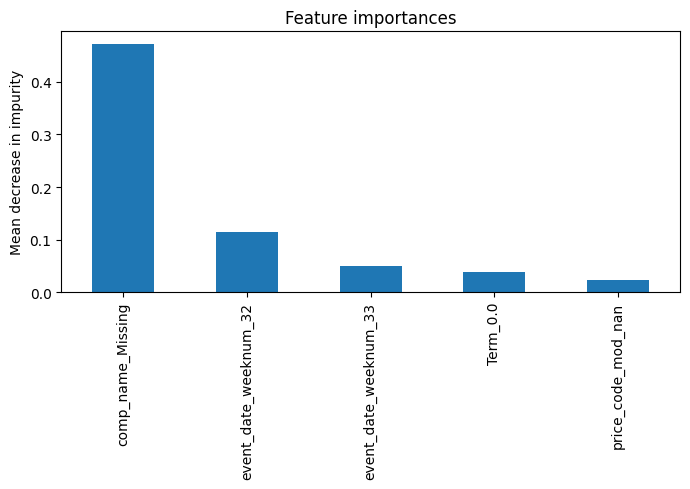

In [33]:
importance = feature_importance.feature_importances_
#std = np.std([tree.feature_importances_ for tree in feature_importance.estimators_], axis=0)
features = num_attribs + list(cat_features)

forest_importances = pd.Series(importance, index=features).sort_values(ascending = False)

fig, ax = plt.subplots(figsize=(7,5))
forest_importances[:5].plot.bar(ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

## Selecting only 250 features since it captures 98% of the variance

In [34]:
cols_keep = list(feature_imp[feature_imp.columns[1]][:250])
cols_keep

/var/folders/vg/7d4f1ys12s17fxmrbfx48h4h0000gn/T/ipykernel_30677/1775547383.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  cols_keep = list(feature_imp[feature_imp.columns[1]][:250])


['comp_name_Missing',
 'event_date_weeknum_32',
 'event_date_weeknum_33',
 'Term_0.0',
 'price_code_mod_nan',
 'event_date_weeknum_34',
 'Resold_0',
 'paid_N',
 'event_date_weeknum_47',
 'event_date_weeknum_38',
 'price_code_mod_S01',
 'TicketType_SingleGame',
 'event_date_weeknum_50',
 'acct_type_desc_mod_House',
 'acct_type_desc_mod_Comp',
 'price_code_mod_S07',
 'price_code_mod_R',
 'price_code_mod_SA',
 'event_name_WAS',
 'class_name_HUNTINGTON',
 'acct_type_desc_mod_Employee',
 'comp_name_Stadium Personnel',
 'Price',
 'ResalePrice',
 'paid_P',
 'comp_name_Charity/Community Relations',
 'TicketType_Employee',
 'Section_Name_based_on_price_Yellow',
 'class_name_SPONSORS',
 'class_name_ACCMAN RELO',
 'class_name_TICKET OPS',
 'comp_name_Military',
 'event_date_weeknum_44',
 'price_code_mod_G06',
 'Section_Name_based_on_price_Green_stripped',
 'isEndMonth_0',
 'Term_5.0',
 'TicketType_Group',
 'Section_Name_based_on_price_Green_Dark',
 'comp_name_Front Office/Club Staff',
 'price_cod

In [35]:
X_train_prepared = X_train_prepared[cols_keep]
X_test_prepared = X_test_prepared[cols_keep]

In [36]:
X_train_prepared.shape

(810707, 260)

In [37]:
X_test_prepared.shape

(347446, 260)

In [38]:
y_train.value_counts()

1    630820
0    179887
Name: isAttended, dtype: int64

# XGBoost Model

In [40]:
X_train_prepared = scipy.sparse.csr_matrix(X_train_prepared.values)

In [41]:
X_train_prepared

<810707x260 sparse matrix of type '<class 'numpy.float64'>'
	with 16995915 stored elements in Compressed Sparse Row format>

In [42]:
X_test_prepared = scipy.sparse.csr_matrix(X_test_prepared.values)

## Hyperparameter Tuning using RandomSearchCV

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, confusion_matrix, roc_curve, auc, \
            classification_report, recall_score, precision_recall_curve
from sklearn.model_selection import RandomizedSearchCV

xgb = XGBClassifier(random_state = 42) 
scoring = {'Recall': make_scorer(recall_score),
           'f1_score': make_scorer(f1_score),
           'accuracy':make_scorer(accuracy_score)
          }

params = { 'max_depth': [10],
           'learning_rate': [0.01, 0.1],
           'subsample': np.arange(0.5, 1.0,0.1),
           'colsample_bytree': [0.4,0.5,0.6],
           'colsample_bylevel': [0.4,0.5,0.6],
           'n_estimators': [100,500]
           }

grid_clf = RandomizedSearchCV(estimator = xgb, param_distributions = params,cv =5, n_jobs=-1, verbose=4,n_iter=1,scoring='roc_auc')
grid_clf.fit(X_train_prepared, y_train)

In [45]:
model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.6,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, gamma=0,gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=500, n_jobs=48, num_parallel_tree=1,
              predictor='auto', random_state=42, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=0.42, subsample=0.6, tree_method='exact',
              validate_parameters=1, verbosity=None,eval_metric='logloss',use_label_encoder=False)

/Users/sumitha/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


## Stratified K-fold

In [46]:

kfold = StratifiedKFold(n_splits=5,shuffle = True, random_state=7)
results = cross_val_score(model, X_train_prepared, y_train, cv=kfold,scoring = "roc_auc")

In [47]:
print("Average AUC: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

In [49]:
model.fit(X_train_prepared, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=0.6, colsample_bynode=1, colsample_bytree=0.6,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, gamma=0, gpu_id=-1,
              grow_policy=None, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=0,
              max_depth=10, max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=500, n_jobs=48,
              num_parallel_tree=1, predictor='auto', random_state=42, ...)

### Train Classification Report

In [50]:
from sklearn.metrics import classification_report
pred1 = model.predict(X_train_prepared)
print(classification_report(y_train, pred1))

              precision    recall  f1-score   support

           0       0.69      0.62      0.65    179887
           1       0.89      0.92      0.91    630820

    accuracy                           0.85    810707
   macro avg       0.79      0.77      0.78    810707
weighted avg       0.85      0.85      0.85    810707



In [51]:
f1_score(y_train, pred1)

0.907799823002905

### Test Classification Report

In [52]:
from sklearn.metrics import classification_report
pred = model.predict(X_test_prepared)
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.60      0.67      0.63     68868
           1       0.92      0.89      0.90    278578

    accuracy                           0.84    347446
   macro avg       0.76      0.78      0.77    347446
weighted avg       0.85      0.84      0.85    347446



In [53]:
f1_score(pred,y_test)

0.9017005996755554

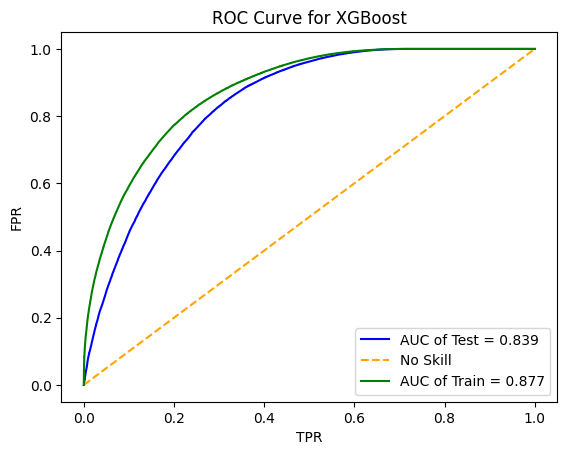

In [60]:
y_pred_proba = model.predict_proba(X_test_prepared)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="AUC of Test = "+str(round(auc,3)), color = 'blue')
plt.plot([0, 1], [0, 1], label = 'No Skill', linestyle = '--', color = 'orange')

y_pred_proba = model.predict_proba(X_train_prepared)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_train,  y_pred_proba)
auc = metrics.roc_auc_score(y_train, y_pred_proba)
plt.plot(fpr,tpr,label="AUC of Train = "+str(round(auc,3)), color = 'green')

plt.legend(loc=4)
plt.title('ROC Curve for XGBoost')
plt.ylabel('FPR')
plt.xlabel('TPR')
plt.show()

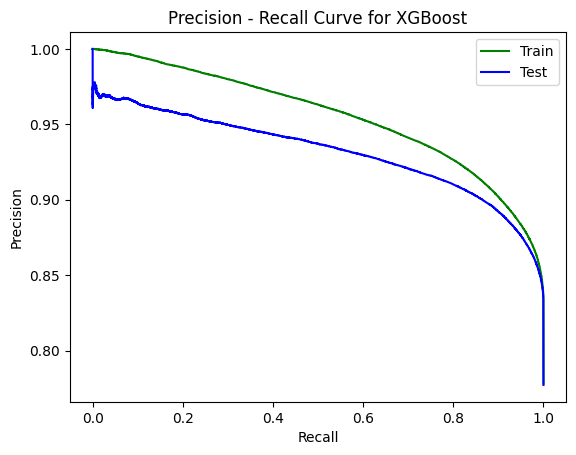

In [59]:
from sklearn.metrics import precision_recall_curve
y_score = model.predict_proba(X_train_prepared)[:, 1]
precision1, recall1, thresholds1 = precision_recall_curve(y_train, y_score)

y_score1 = model.predict_proba(X_test_prepared)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_score1)

#create precision recall curve
plt.plot(recall1, precision1, label="Train", color = 'green')

plt.plot(recall, precision,label="Test", color = 'blue')
plt.legend(loc=1)
#add axis labels to plot
plt.title('Precision - Recall Curve for XGBoost')
plt.ylabel('Precision')
plt.xlabel('Recall')

#display plot
plt.show()

# Catboost

In [77]:
model = CatBoostClassifier(scale_pos_weight=0.40,logging_level='Silent',max_depth = 10, n_estimators = 800)

In [78]:
model.fit(X_train_prepared, y_train)

In [79]:
from sklearn.metrics import classification_report
pred1 = model.predict(X_train_prepared)
print(classification_report(y_train, pred1))

              precision    recall  f1-score   support

           0       0.71      0.67      0.69    179887
           1       0.91      0.92      0.91    630820

    accuracy                           0.87    810707
   macro avg       0.81      0.80      0.80    810707
weighted avg       0.86      0.87      0.87    810707



In [80]:
f1_score(y_train, pred1)

0.914762027302782

In [81]:
from sklearn.metrics import classification_report
pred = model.predict(X_test_prepared)
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.62      0.67      0.64     72242
           1       0.91      0.89      0.90    275204

    accuracy                           0.85    347446
   macro avg       0.77      0.78      0.77    347446
weighted avg       0.85      0.85      0.85    347446



In [82]:
f1_score(pred,y_test)

0.9024898396349605

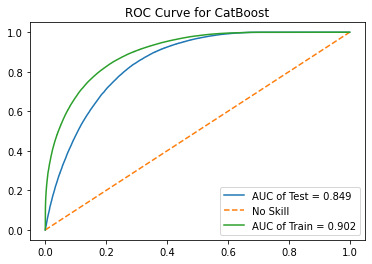

In [83]:
y_pred_proba = model.predict_proba(X_test_prepared)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="AUC of Test = "+str(round(auc,3)))
plt.plot([0, 1], [0, 1], label = 'No Skill', linestyle = '--' )

y_pred_proba = model.predict_proba(X_train_prepared)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_train,  y_pred_proba)
auc = metrics.roc_auc_score(y_train, y_pred_proba)
plt.plot(fpr,tpr,label="AUC of Train = "+str(round(auc,3)))

plt.legend(loc=4)
plt.title('ROC Curve for CatBoost')
plt.show()

# LightGBM

In [86]:
model = LGBMClassifier(random_state = 42,scale_pos_weight=0.40)

In [87]:
model.fit(X_train_prepared, y_train)

LGBMClassifier(random_state=42, scale_pos_weight=0.4)

In [88]:
from sklearn.metrics import classification_report
pred1 = model.predict(X_train_prepared)
print(classification_report(y_train, pred1))

              precision    recall  f1-score   support

           0       0.64      0.57      0.60    179887
           1       0.88      0.91      0.89    630820

    accuracy                           0.83    810707
   macro avg       0.76      0.74      0.75    810707
weighted avg       0.83      0.83      0.83    810707



In [89]:
f1_score(y_train, pred1)

0.8937750415322975

In [90]:
from sklearn.metrics import classification_report
pred = model.predict(X_test_prepared)
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.58      0.64      0.60     69997
           1       0.91      0.88      0.89    277449

    accuracy                           0.83    347446
   macro avg       0.74      0.76      0.75    347446
weighted avg       0.84      0.83      0.84    347446



In [91]:
f1_score(pred,y_test)

0.8934120668272753

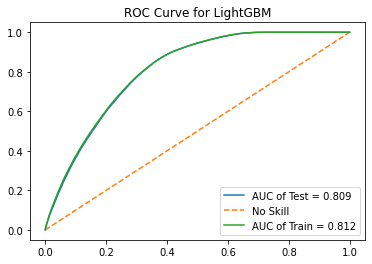

In [92]:
y_pred_proba = model.predict_proba(X_test_prepared)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="AUC of Test = "+str(round(auc,3)))
plt.plot([0, 1], [0, 1], label = 'No Skill', linestyle = '--' )

y_pred_proba = model.predict_proba(X_train_prepared)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_train,  y_pred_proba)
auc = metrics.roc_auc_score(y_train, y_pred_proba)
plt.plot(fpr,tpr,label="AUC of Train = "+str(round(auc,3)))

plt.legend(loc=4)
plt.title('ROC Curve for LightGBM')
plt.show()

# Random Forest for feature selection

In [98]:
class_weight = {0:4.9,1:1}
rdf = RandomForestClassifier(random_state = 42, class_weight = class_weight,n_jobs =-1) 

In [99]:
rdf.fit(X_train_prepared, y_train)
pred_train = rdf.predict(X_train_prepared)

In [100]:
#rdf.fit(X_test_prep, y_train_prep)
pred_test = rdf.predict(X_test_prepared)

In [103]:
from sklearn.metrics import classification_report
pred_train = rdf.predict(X_train_prepared)
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87    179887
           1       0.99      0.93      0.96    630820

    accuracy                           0.94    810707
   macro avg       0.89      0.94      0.91    810707
weighted avg       0.94      0.94      0.94    810707



In [108]:
f1_score(y_train, pred_train)

0.958211357479258

In [105]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.67      0.71      0.69     77394
           1       0.91      0.90      0.91    270052

    accuracy                           0.86    347446
   macro avg       0.79      0.80      0.80    347446
weighted avg       0.86      0.86      0.86    347446



In [109]:
f1_score(pred_test,y_test)

0.9075285103017596

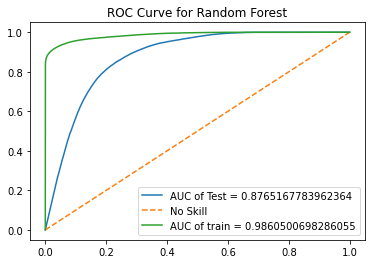

In [107]:
y_pred_proba = rdf.predict_proba(X_test_prepared)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="AUC of Test = "+str(auc))
plt.plot([0, 1], [0, 1], label = 'No Skill', linestyle = '--' )

y_pred_proba = rdf.predict_proba(X_train_prepared)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_train,  y_pred_proba)
auc = metrics.roc_auc_score(y_train, y_pred_proba)
plt.plot(fpr,tpr,label="AUC of train = "+str(auc))

plt.legend(loc=4)
plt.title('ROC Curve for Random Forest')
plt.show()